# Decision Trees

## imports

In [3]:
import sklearn
import numpy as np
import pandas as pd

import graphviz
import sklearn.tree
from io import StringIO


Execute the code below if you didn't put anaconda in your path on OSX
```
import os
os.environ["PATH"] = "{}:{}".format(os.path.expanduser("~/anaconda3/bin"), os.environ["PATH"])
```

Additionally you need to install `graphviz` and `python-graphviz` 

[Instructions for the command line](https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/)
or install it under the Anaconda Navigator using the environments tab.

## Load Data

In [4]:
col_names = "rain,hot temp.,mild temp.,High Humidity,Strong winds,playTennis"
my_tennis_data = np.array([[0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 0]])
tennis_df = pd.DataFrame(data=my_tennis_data, columns=col_names.split(","))

In [5]:
tennis_df

,rain,hot temp.,mild temp.,High Humidity,Strong winds,playTennis
0,0,1,0,1,0,0
1,0,1,0,1,1,0
2,1,0,1,1,0,1
3,1,0,0,0,0,1
4,1,0,0,0,1,0
5,0,0,1,1,0,1
6,0,0,0,0,0,1
7,1,0,1,0,0,1
8,0,0,1,0,1,1
9,1,0,1,1,1,0


In [6]:
### select all rows except last column
X = tennis_df.drop(["playTennis"], axis=1)
### select last column
y = tennis_df["playTennis"]

In [7]:
X.shape

(10, 5)

## DecisionTree Classifier

In [8]:
### Initiate classifier
infoGain_clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy')

### Fit classifier
infoGain_clf_tree = infoGain_clf.fit(X, y)

## Visualizing the Tree

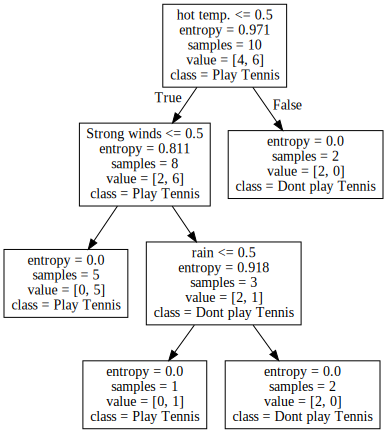

In [9]:
ss = StringIO()

feature_names = X.columns
label_name = ["Dont play Tennis", "Play Tennis"]

sklearn.tree.export_graphviz(infoGain_clf_tree, feature_names=feature_names,
                             class_names=label_name,
                             label="all", out_file=ss)

graphviz.Source(ss.getvalue())

In [10]:
print("predicted:", infoGain_clf.predict(X[-2:]))
print("truth", y[-2:].values)

predicted: [1 0]
truth [1 0]


In [11]:
X[-2:]

,rain,hot temp.,mild temp.,High Humidity,Strong winds
8,0,0,1,0,1
9,1,0,1,1,1
